<a href="https://colab.research.google.com/github/ayushrathod04/MACHINE_LEARNING/blob/main/intershipday7workfromhome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

spotify

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Spotify dataset
spotify_data = pd.read_csv('/content/Most Streamed Spotify Songs 2024 - Most Streamed Spotify Songs 2024 (1).csv')

# Data Preprocessing
# Remove commas and convert to floats
for col in spotify_data.columns:
    if spotify_data[col].dtype == 'object':
        spotify_data[col] = spotify_data[col].str.replace(',', '').str.replace('NaN', '').replace('', np.nan)
        try:
            spotify_data[col] = spotify_data[col].astype(float)
        except ValueError:
            print(f"Error converting column: {col}")

# Drop rows with missing target values
spotify_data = spotify_data.dropna(subset=['Spotify Streams'])

# Handle missing values in features by filling with the mean
spotify_data = spotify_data.fillna(spotify_data.mean(numeric_only=True))

# Feature Selection
features = ['Track Score', 'Spotify Playlist Count', 'Spotify Playlist Reach',
            'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
            'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
            'Soundcloud Streams', 'Shazam Counts', 'Explicit Track']
target = 'Spotify Streams'

# Define X and y
X = spotify_data[features]
y = spotify_data[target]

# Ensure all features are numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop any remaining rows with NaN values
X = X.dropna()
y = y.loc[X.index]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Error converting column: Track
Error converting column: Album Name
Error converting column: Artist
Error converting column: Release Date
Error converting column: ISRC
Mean Squared Error: 7.645790559470035e+16
R-squared: 0.7228508518828742


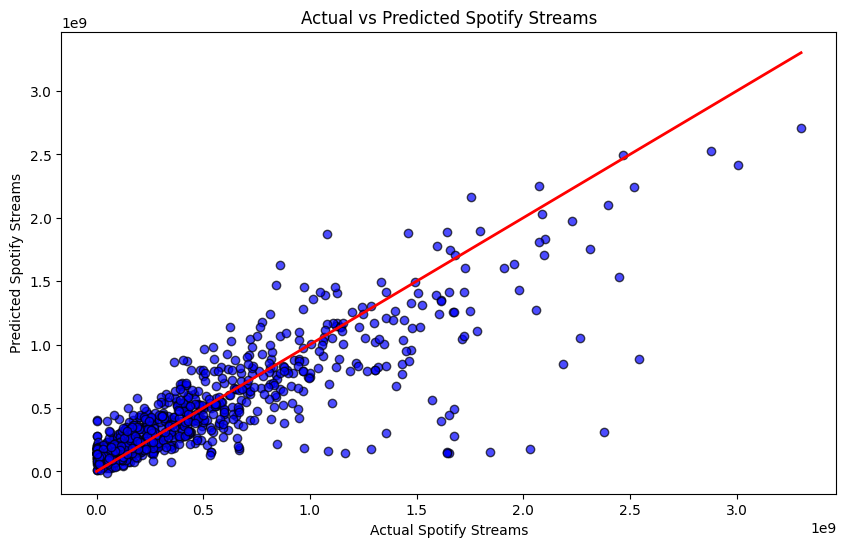

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Spotify Streams')
plt.ylabel('Predicted Spotify Streams')
plt.title('Actual vs Predicted Spotify Streams')
plt.show()

frictional data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df=pd.read_csv('/content/fictional_character_battles_complex - fictional_character_battles_complex.csv')
df.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [ ]:
print(df.isnull().sum())


Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64


In [ ]:

label_encoder = LabelEncoder()
df['Character'] = label_encoder.fit_transform(df['Character'])
df['Universe'] = label_encoder.fit_transform(df['Universe'])
df['SpecialAbilities'] = label_encoder.fit_transform(df['SpecialAbilities'])
df['Weaknesses'] = label_encoder.fit_transform(df['Weaknesses'])

In [ ]:
X = df.drop('BattleOutcome', axis=1)
y = df['BattleOutcome']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(random_state=42)

In [ ]:
log_reg = LogisticRegression(random_state=42)

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)  # Fit the model to the training data
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [ ]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Performance:
Accuracy: 0.8046709129511678


In [ ]:
models = ['Logistic Regression',accuracy_score(y_test, y_pred_log_reg)]

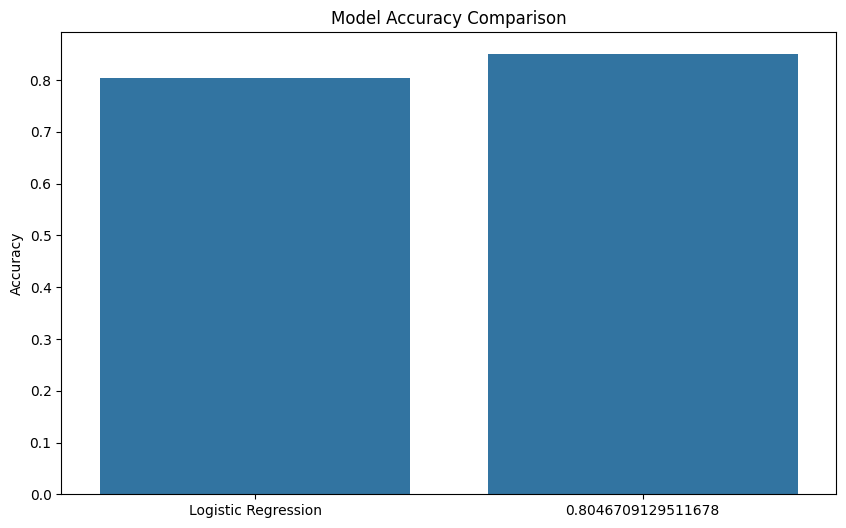

In [ ]:
accuracy_scores = [accuracy_score(y_test, y_pred_log_reg), 0.85]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


whether

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
climet= pd.read_csv('/content/weather_classification_data - weather_classification_data.csv')

In [ ]:
climet.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
climet = climet.dropna()

In [ ]:
label_encoder = LabelEncoder()
climet['Humidity'] = label_encoder.fit_transform(climet['Humidity'])

In [ ]:
features = ['Temperature', 'Humidity', 'Wind Speed']
target = 'Temperature'


In [ ]:
X = climet[features]
y = climet[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.14924242424242423


<function matplotlib.pyplot.show(close=None, block=None)>

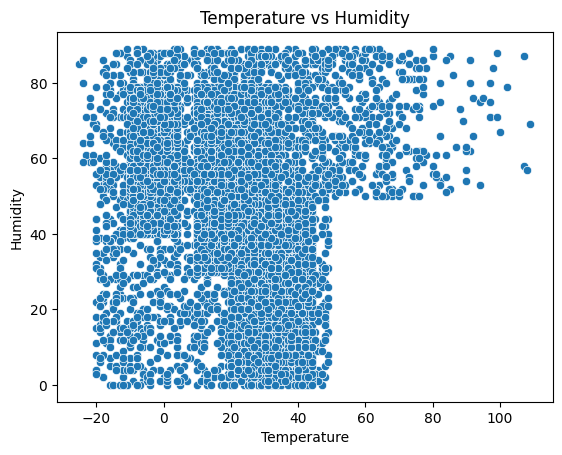

In [ ]:
sns.scatterplot(x='Temperature', y='Humidity', data=climet)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.show

game task

In [ ]:
game=pd.read_csv('/content/online_gaming_behavior_dataset - online_gaming_behavior_dataset.csv')

In [ ]:
game.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


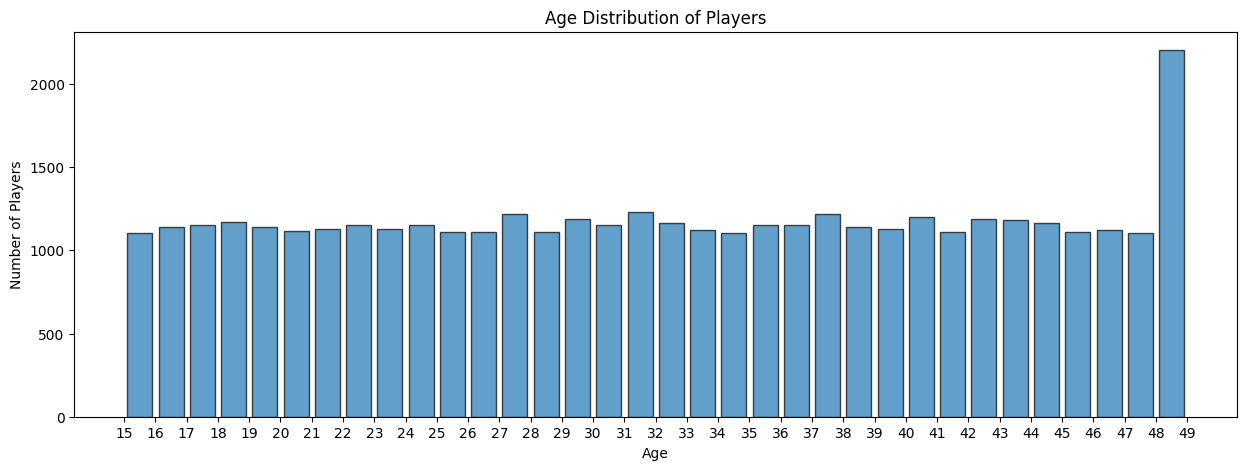

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(game['Age'], bins=range(15, 50), edgecolor='black', alpha=0.7, rwidth=0.8)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.xticks(range(15, 50))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(game.columns)


Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')


In [ ]:
columns_to_encode = ['Gender', 'Location', 'GameGenre', 'GameDifficulty', 'EngagementLevel']

In [ ]:
print(game.columns)
game.info()

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSe

In [ ]:
le = LabelEncoder()
game['Gender'] = le.fit_transform(game['Gender'])
game['Location'] = le.fit_transform(game['Location'])
game['GameGenre'] = le.fit_transform(game['GameGenre'])
game['GameDifficulty'] = le.fit_transform(game['GameDifficulty'])
game['EngagementLevel'] = le.fit_transform(game['EngagementLevel'])

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
# Use 'game' instead of 'df' to scale the correct DataFrame
game[numerical_features] = scaler.fit_transform(game[numerical_features])

# Splitting the dataset into features and target variable
X = game.drop(['PlayerID', 'EngagementLevel'], axis=1)
y = game['EngagementLevel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression(max_iter=50000)

# Model Training
model.fit(X_train, y_train)

# Making Prediction
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8206569251904583


<Axes: xlabel='Age', ylabel='PlayTimeHours'>

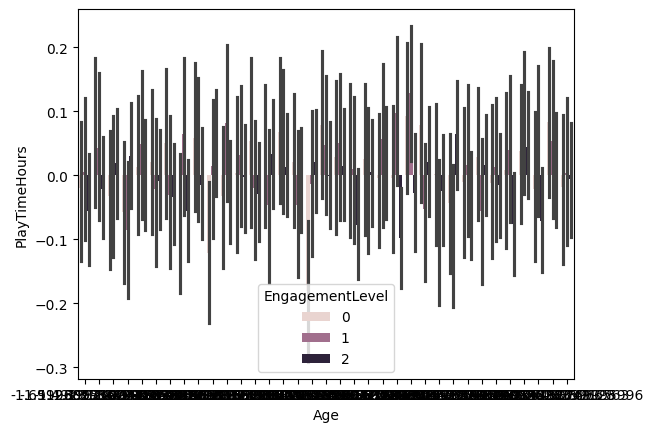

In [ ]:
sns.barplot(x='Age', y='PlayTimeHours', hue='EngagementLevel', data=game)